In [2]:
# base (Python 3.11.7)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/raw.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
# Data checks to be performed
"""
1. Check for missing values
2. Check for duplicates
3. Check for data types
4. Check for unique values in categorical columns
5. Check statistics of dataset
6. Check various categories present different categorical column
"""

'\n1. Check for missing values\n2. Check for duplicates\n3. Check for data types\n4. Check for unique values in categorical columns\n5. Check statistics of dataset\n6. Check various categories present different categorical column\n'

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
{col: df[col].unique() for col in df.columns}

{'gender': array(['female', 'male'], dtype=object),
 'race/ethnicity': array(['group B', 'group C', 'group A', 'group D', 'group E'],
       dtype=object),
 'parental level of education': array(["bachelor's degree", 'some college', "master's degree",
        "associate's degree", 'high school', 'some high school'],
       dtype=object),
 'lunch': array(['standard', 'free/reduced'], dtype=object),
 'test preparation course': array(['none', 'completed'], dtype=object),
 'math score': array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
         50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
         97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
         39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
         98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
         35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
         19,  23,   8], dtype=int64),
 'reading score': array([ 72,  90,  95

In [14]:
# Define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### Adding columns for Total Score and Average


In [16]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average_score'] = df['total_score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
# No. of students with full marks in all subjects
full_marks_students = df[(df['math score'] == 100) & (df['reading score'] == 100) & (df['writing score'] == 100)]
print(f'Number of students with full marks in all subjects: {len(full_marks_students)}')

Number of students with full marks in all subjects: 3


In [21]:
# No. of students with less than 40 in all subjects
low_score_students = df[(df['math score'] < 40) & (df['reading score'] < 40) & (df['writing score'] < 40)]
print(f'Number of students with less than 40 in all subjects: {len(low_score_students)}')

Number of students with less than 40 in all subjects: 18


In [22]:
# Visualization - Exploring Data

### Histogram and KDE (Kernel density estimator) plot for numerical features

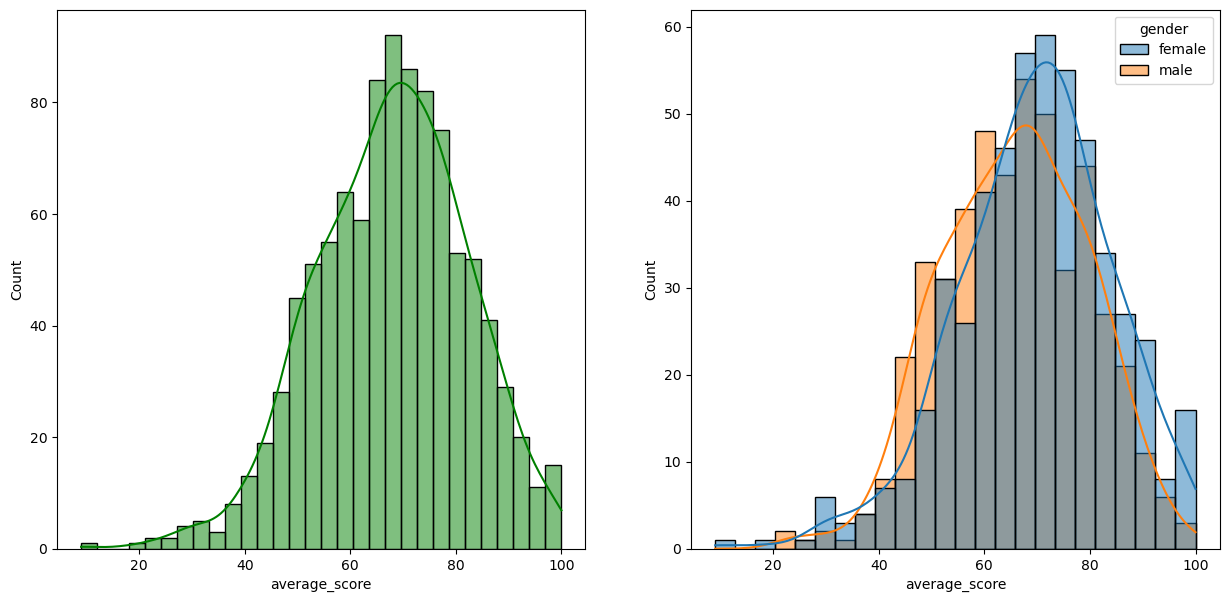

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average_score', kde=True, hue='gender')
plt.show()

### Insight - Female performance is better compared to male.

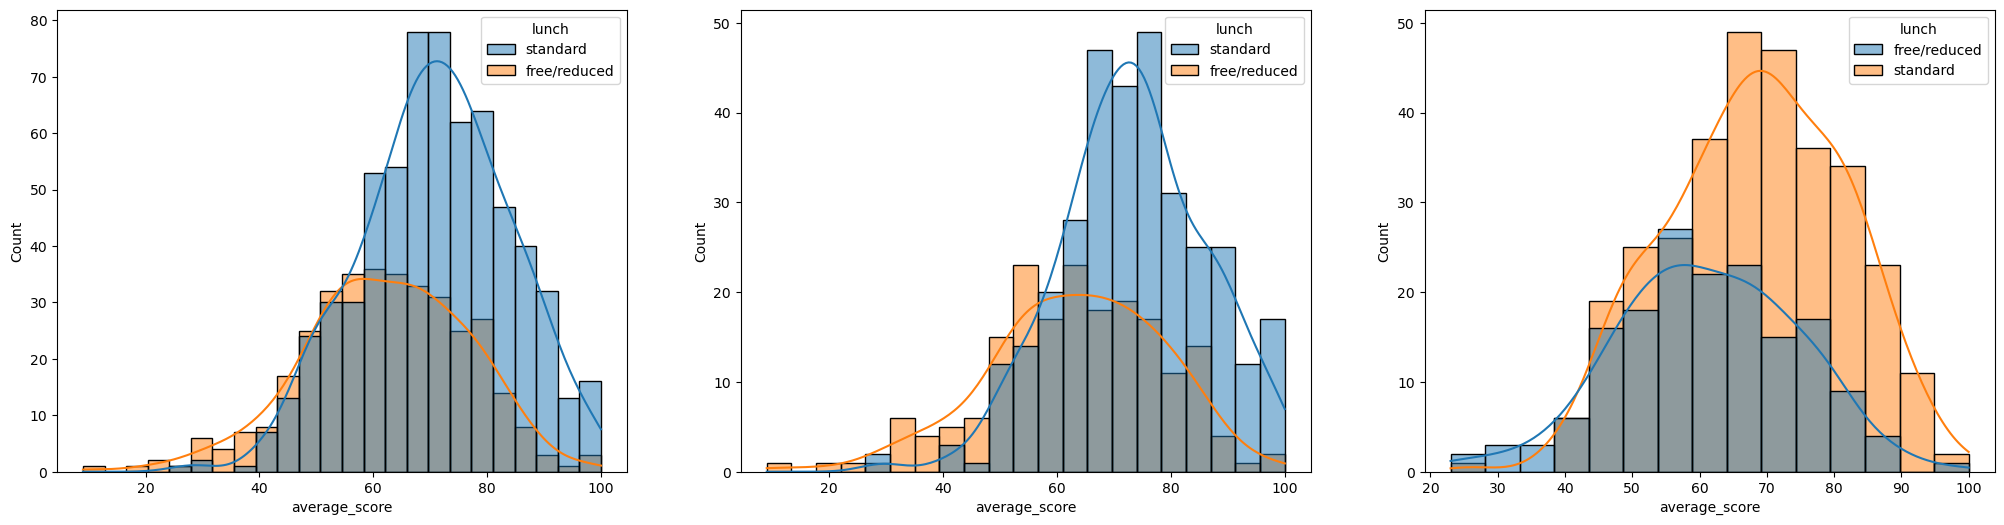

In [26]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='average_score', kde=True, hue='lunch')
plt.subplot(1, 3, 2)
sns.histplot(data=df[df.gender == 'female'], x='average_score', kde=True, hue='lunch')
plt.subplot(1, 3, 3)
sns.histplot(data=df[df.gender == 'male'], x='average_score', kde=True, hue='lunch')
plt.show()

### Insight -
- Standard lunch students perform better.